In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/housing_dataset.csv")

In [3]:
df.head()

,Id,Neighborhood,LotFrontage,LotArea,number of bedrooms,Street,Alley,OverallQual,OverallCond,Date,...,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,SquareFootage,Heating,HeatingQC,SaleType,SaleCondition,Price
0,1,RL,65.0,8450.0,2.0,Pave,NaN,7,5,2003,...,706,Unf,0,150,856,GasA,Ex,WD,Normal,208500
1,2,RL,80.0,9600.0,3.0,Pave,NaN,6,8,1976,...,978,Unf,0,284,1262,GasA,Ex,WD,Normal,181500
2,3,RL,68.0,11250.0,3.0,Pave,NaN,7,5,2001,...,486,Unf,0,434,920,GasA,Ex,WD,Normal,223500
3,4,RL,60.0,9550.0,3.0,Pave,NaN,7,5,1915,...,216,Unf,0,540,756,GasA,Gd,WD,Abnorml,140000
4,5,RL,84.0,NaN,2.0,Pave,NaN,8,5,2000,...,655,Unf,0,490,1145,GasA,Ex,WD,Normal,250000


In [4]:
newdf=df.loc[:,["LotArea","Price"]] #selecting particular columns and storing it in a dataset

In [5]:
newdf.head()

,LotArea,Price
0,8450.0,208500
1,9600.0,181500
2,11250.0,223500
3,9550.0,140000
4,NaN,250000


In [6]:
newdf.shape

(1460, 2)

In [ ]:
newdf.describe()

,LotArea,Price
count,1422.000000,1460.000000
mean,10501.028129,180921.195890
std,10031.873236,79442.502883
min,1300.000000,34900.000000
25%,7508.750000,129975.000000
50%,9475.000000,163000.000000
75%,11600.000000,214000.000000
max,215245.000000,755000.000000


In [ ]:
newdf.isnull().sum()

LotArea    38
Price       0
dtype: int64

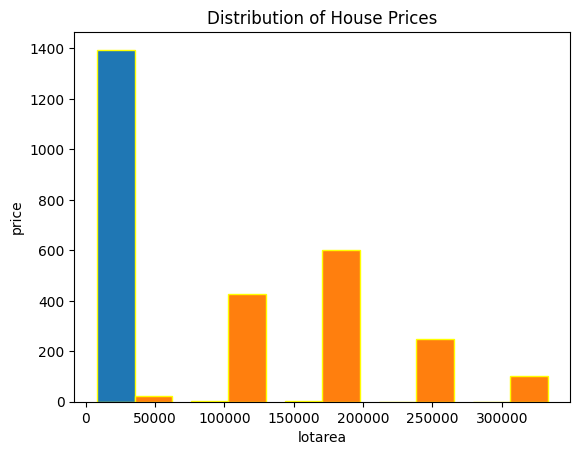

In [24]:
# Continuous Target Variable (House Prices)
plt.hist(exdf, bins=5, edgecolor='yellow')
plt.title('Distribution of House Prices')
plt.xlabel('lotarea')
plt.ylabel('price')
plt.show()

<Axes: >

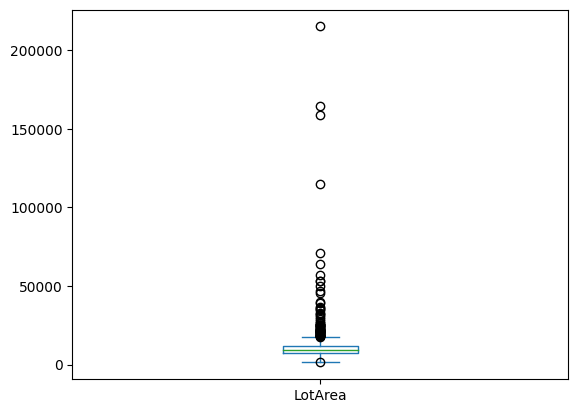

In [7]:
newdf["LotArea"].plot(kind="box")


In [8]:
newdf["LotArea"].median()

9475.0

In [9]:
newdf["Price"].median()

163000.0

In [10]:
newdf["LotArea"]=newdf["LotArea"].fillna(newdf["LotArea"].median())
newdf["Price"]=newdf["Price"].fillna(newdf["Price"].median())

In [11]:
newdf.isnull().sum()

LotArea    0
Price      0
dtype: int64

In [ ]:
newdf.describe()

,LotArea,Price
count,1460.000000,1460.000000
mean,10474.323288,180921.195890
std,9901.718672,79442.502883
min,1300.000000,34900.000000
25%,7590.000000,129975.000000
50%,9475.000000,163000.000000
75%,11475.750000,214000.000000
max,215245.000000,755000.000000


<Axes: >

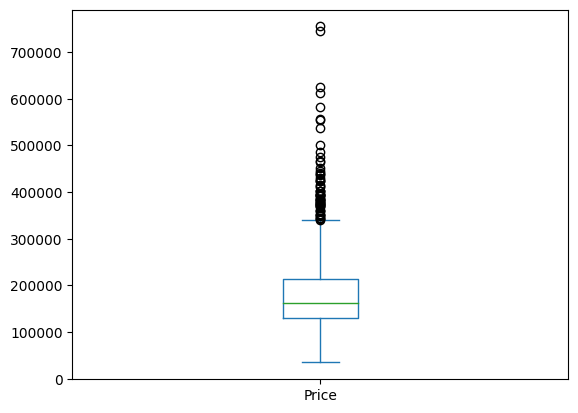

In [26]:
newdf["Price"].plot(kind="box")

In [12]:
q1=129975.000000
q3=214000.000000
IQR=q3-q1
IQR

84025.0

In [13]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("lower_limit=",lower_limit)
print("Upper_limit=",upper_limit)

lower_limit= 3937.5
Upper_limit= 340037.5


In [14]:
outliers=newdf[(newdf["Price"]>upper_limit)|(newdf["Price"]<lower_limit)]
outliers

,LotArea,Price
11,11924.0,345000
53,50271.0,385000
58,13682.0,438780
112,9965.0,383970
151,13891.0,372402
...,...,...
1268,14100.0,381000
1353,14720.0,410000
1373,11400.0,466500
1388,14892.0,377500


In [22]:
outliers.shape

(61, 2)

In [15]:
exdf=newdf[(newdf["Price"]<upper_limit)&(newdf["Price"]>lower_limit)]


In [16]:
exdf.shape

(1399, 2)

<Axes: >

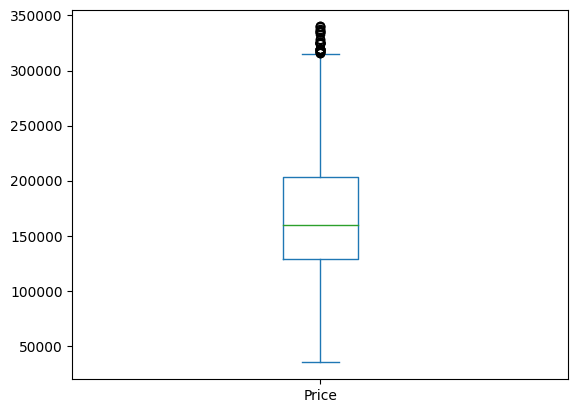

In [17]:
exdf["Price"].plot(kind="box")

In [18]:
exdf.describe()

,LotArea,Price
count,1399.000000,1399.000000
mean,10144.856326,170237.127234
std,8304.869640,59230.130817
min,1300.000000,34900.000000
25%,7500.000000,129000.000000
50%,9430.000000,159500.000000
75%,11250.000000,203500.000000
max,164660.000000,340000.000000


In [21]:
exdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LotArea  1399 non-null   float64
 1   Price    1399 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 32.8 KB


In [22]:
exdf["LotArea"]=exdf["LotArea"].astype(int)

<ipython-input-22-17ed826a8642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exdf["LotArea"]=exdf["LotArea"].astype(int)


In [23]:
exdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   LotArea  1399 non-null   int64
 1   Price    1399 non-null   int64
dtypes: int64(2)
memory usage: 32.8 KB


In [25]:
exdf.isnull().sum()

LotArea    0
Price      0
dtype: int64

In [45]:
x=exdf.drop(columns="Price")
y=exdf["Price"]

In [53]:
y=np.array(y)
x=np.array(x)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
m=lr.intercept_
m

array([151307.88160364])

In [86]:
c=lr.coef_
c

array([[1.98467391]])

In [87]:
lr.predict([[1500]]) #it should be passed in 2D array,it predicts

array([[154284.8924702]])

In [95]:

def price_predection(LotArea):
  return lr.predict([[LotArea]])


price_predection(50271)

array([[251079.42378553]])

In [89]:
%%capture
pip install gradio

In [90]:
import gradio as gr

In [93]:
# Define the prediction function
def price_predection(LotArea):
  return lr.predict([[LotArea]])


demo=gr.Interface(
    fn=price_predection, #this should be the function we created above
    inputs=["number"],
    outputs=["number"],
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://19c08a0679cf274c08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
